# ML lec 03 - Linear Regression의 cost 최소화 알고리즘의 원리 설명



In [27]:
%pylab inline

import tensorflow as tf
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


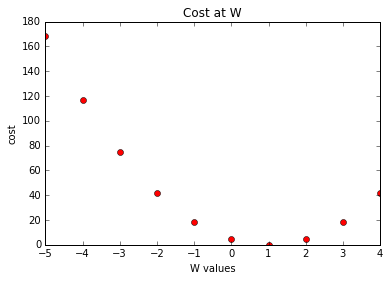

 146.828 [-4.60919857]
41.7644 [-1.99157262]
11.8796 [-0.59550524]
3.3791 [ 0.14906383]
0.961166 [ 0.54616737]
0.273398 [ 0.75795591]
0.0777666 [ 0.87090981]
0.0221203 [ 0.93115187]
0.006292 [ 0.96328098]
0.00178972 [ 0.98041654]
0.000509075 [ 0.98955548]
0.000144804 [ 0.99442959]
4.11881e-05 [ 0.99702913]
1.17157e-05 [ 0.99841553]
3.33291e-06 [ 0.99915493]
9.47873e-07 [ 0.99954933]
2.69531e-07 [ 0.99975967]
7.66074e-08 [ 0.99987185]
2.18038e-08 [ 0.99993163]
6.20969e-09 [ 0.99996352]
1.75736e-09 [ 0.99998057]
4.99488e-10 [ 0.99998963]
1.44057e-10 [ 0.99999446]
4.21636e-11 [ 0.99999702]
1.15818e-11 [ 0.99999845]
3.05533e-12 [ 0.99999917]
1.06108e-12 [ 0.99999952]
2.65269e-13 [ 0.99999976]
9.9476e-14 [ 0.99999988]
2.4869e-14 [ 0.99999994]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.0 [ 1.]
0.

In [38]:
# 실제 gradient 값을 계산해본다.

x_data = [1.0, 2.0, 3.0]
y_data = [1.0, 2.0, 3.0]

W = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

hypothesis = W * X

cost = tf.reduce_mean(tf.square(hypothesis - y))

gradient = tf.mul(0.1, tf.reduce_mean( tf.mul((hypothesis - y), X) ) )
descent = W - gradient

# TODO: assign() 명령어가 뭐지?
# 이 문장이 중요한 역할을 한다. 
update = W.assign(descent)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

w_val = []
cost_val = []
for i in range(-5, 5):
    w_val.append(i)
    cost_val.append( sess.run(cost, feed_dict = {X: x_data, y: y_data, W: i}) )

plt.plot(w_val, cost_val, 'ro')
plt.title('Cost at W')
plt.xlabel('W values')
plt.ylabel('cost')
plt.show()

# cost가 최소가 되는 파라미터 W의 값을 찾는다. 
for i in xrange(100):
    sess.run(update, feed_dict = {X: x_data, y: y_data})
    print sess.run(cost, feed_dict = {X: x_data, y: y_data}), sess.run(W)

Epoch: 0001 cost= 16.230159760 W= 1.14249 b= 0.53701
Epoch: 0051 cost= 0.085001856 W= 0.299811 b= 0.440203
Epoch: 0101 cost= 0.084073089 W= 0.296825 b= 0.46169
Epoch: 0151 cost= 0.083251737 W= 0.294016 b= 0.481898
Epoch: 0201 cost= 0.082525425 W= 0.291374 b= 0.500905
Epoch: 0251 cost= 0.081883192 W= 0.288889 b= 0.51878
Epoch: 0301 cost= 0.081315264 W= 0.286552 b= 0.535592
Epoch: 0351 cost= 0.080813080 W= 0.284354 b= 0.551405
Epoch: 0401 cost= 0.080369040 W= 0.282286 b= 0.566278
Epoch: 0451 cost= 0.079976380 W= 0.280342 b= 0.580266
Epoch: 0501 cost= 0.079629213 W= 0.278513 b= 0.593423
Epoch: 0551 cost= 0.079322249 W= 0.276793 b= 0.605798
Epoch: 0601 cost= 0.079050891 W= 0.275175 b= 0.617436
Epoch: 0651 cost= 0.078811027 W= 0.273654 b= 0.62838
Epoch: 0701 cost= 0.078598954 W= 0.272223 b= 0.638673
Epoch: 0751 cost= 0.078411475 W= 0.270877 b= 0.648354
Epoch: 0801 cost= 0.078245744 W= 0.269611 b= 0.65746
Epoch: 0851 cost= 0.078099266 W= 0.268421 b= 0.666024
Epoch: 0901 cost= 0.077969737 W= 

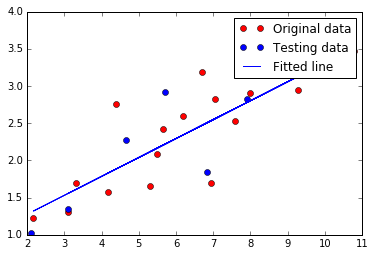

In [39]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
activation = tf.add(tf.mul(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'


    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83,4.668,8.9,7.91,5.7,8.7,3.1,2.1])
    test_Y = numpy.asarray([1.84,2.273,3.2,2.831,2.92,3.24,1.35,1.03])

    print "Testing... (L2 loss Comparison)"
    testing_cost = sess.run(tf.reduce_sum(tf.pow(activation-Y, 2))/(2*test_X.shape[0]),
                            feed_dict={X: test_X, Y: test_Y}) #same function as cost above
    print "Testing cost=", testing_cost
    print "Absolute l2 loss difference:", abs(training_cost - testing_cost)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()